In [16]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import pandas as pd
import lifelines
from lifelines.datasets import load_dd

from lifelines.plotting import plot_lifetimes
from numpy.random import uniform, exponential

data = load_dd()

data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [17]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

T = data["duration"]
C = data["observed"]
kmf.fit(T, event_observed=C)

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

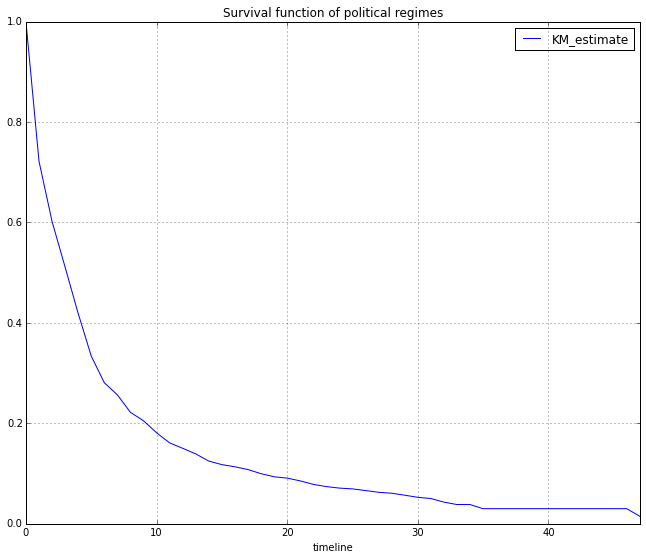

In [18]:
kmf.survival_function_.plot()
_ = plt.title("Survival function of political regimes")

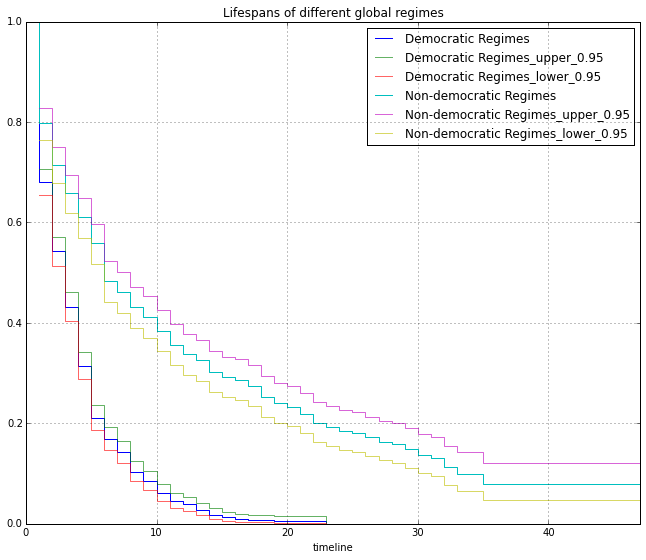

In [19]:
ax = plt.subplot(111)

dem = (data["democracy"] == "Democracy")
kmf.fit(T[dem], event_observed=C[dem], label="Democratic Regimes")
kmf.plot(ax=ax, ci_force_lines=True)
kmf.fit(T[~dem], event_observed=C[~dem], label="Non-democratic Regimes")
kmf.plot(ax=ax, ci_force_lines=True)

plt.ylim(0,1)
_ = plt.title("Lifespans of different global regimes")

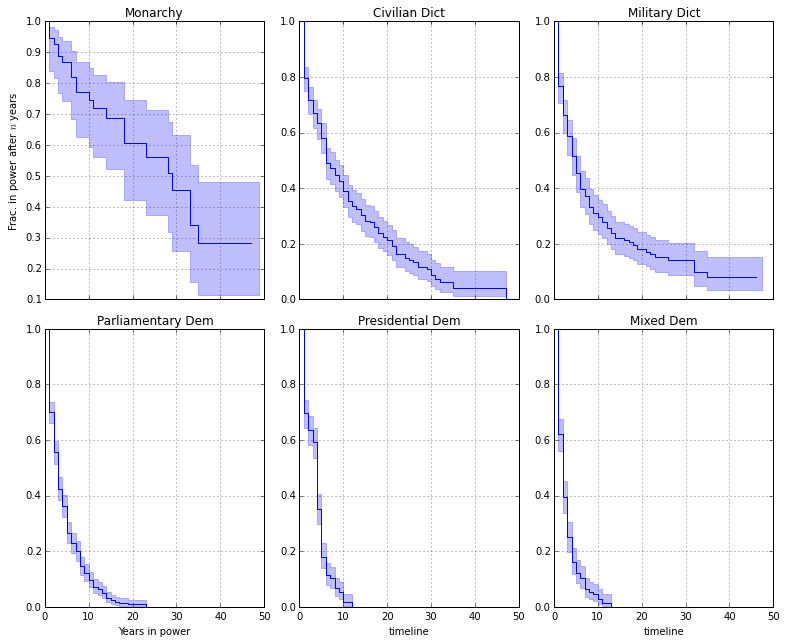

In [20]:
regime_types = data["regime"].unique()

for i,regime_type in enumerate(regime_types):
    ax = plt.subplot(2,3,i+1)
    ix = data["regime"] == regime_type
    kmf.fit(T[ix], C[ix], label=regime_type)
    kmf.plot(ax=ax, legend=False)
    plt.title(regime_type)
    plt.xlim(0,50)
    if i == 0:
        plt.ylabel("Frac. in power after $n$ years")
    if i == 3:
        plt.xlabel("Years in power")

plt.tight_layout()